In [18]:
#packages that need to be imported for this loan repayment prediction.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [20]:
# Load the dataset from CSV into a Pandas DataFrame
df = pd.read_csv('sample_dataset.csv')

# Display the first few rows of the dataset
print(df.head())

   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0  FlowerA  
1  FlowerA  
2  FlowerA  
3  FlowerA  
4  FlowerA  


In [23]:
# Generate summary statistics for the dataset
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

# Calculate mean and standard deviation of Sepal Length
sepal_length_mean = df['Sepal Length (cm)'].mean()
sepal_length_std = df['Sepal Length (cm)'].std()

print("\nMean and Standard Deviation of Sepal Length:")
print(f"Mean: {sepal_length_mean:.2f}")
print(f"Standard Deviation: {sepal_length_std:.2f}")

Summary Statistics:
       Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  \
count          15.000000          15.00000          15.000000   
mean            5.906667           3.06000           3.873333   
std             0.873798           0.31803           1.891887   
min             4.600000           2.30000           1.300000   
25%             5.050000           2.95000           1.450000   
50%             6.300000           3.10000           4.600000   
75%             6.500000           3.20000           5.350000   
max             7.100000           3.60000           6.000000   

       Petal Width (cm)  
count         15.000000  
mean           1.246667  
std            0.829687  
min            0.200000  
25%            0.200000  
50%            1.500000  
75%            1.850000  
max            2.500000  

Mean and Standard Deviation of Sepal Length:
Mean: 5.91
Standard Deviation: 0.87


In [24]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print columns with missing values (if any)
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Example of handling missing values: impute with mean
# Assuming 'Sepal Length (cm)' has missing values
sepal_length_mean = df['Sepal Length (cm)'].mean()
df['Sepal Length (cm)'].fillna(sepal_length_mean, inplace=True)

# Verify if there are any missing values after imputation
missing_values_after_imputation = df.isnull().sum()
print("\nColumns with missing values after imputation:")
print(missing_values_after_imputation[missing_values_after_imputation > 0])

Columns with missing values:
Series([], dtype: int64)

Columns with missing values after imputation:
Series([], dtype: int64)


In [25]:

# Load the dataset from CSV into a Pandas DataFrame
df = pd.read_csv('sample_dataset.csv')

# Define the mapping dictionary
species_map = {
    'FlowerA': 0,
    'FlowerB': 1,
    'FlowerC': 2
}

# Apply the mapping to convert species labels to numerical values
df['Species'] = df['Species'].replace(species_map)

# Display the updated DataFrame to verify the conversion
print(df.head())


   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [26]:
# Load the dataset from CSV into a Pandas DataFrame
df = pd.read_csv('sample_dataset.csv')

# Define features (X) and target (y)
X = df.drop('Species', axis=1)  # Features
y = df['Species']               # Target variable

# Split dataset into training and testing sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print the shapes of the resulting sets to verify the split
print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}")

Shape of X_train: (10, 4), Shape of y_train: (10,)
Shape of X_test: (5, 4), Shape of y_test: (5,)


In [27]:
# Instantiate the DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion='gini',        # or criterion='entropy'
    max_depth=3,             # or other depth limit
    min_samples_split=2,     # minimum samples required to split an internal node
    min_samples_leaf=1,      # minimum samples required to be at a leaf node
    max_features=None,       # or max_features='auto' (consider all features)
    random_state=42          # ensure reproducibility
)

# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

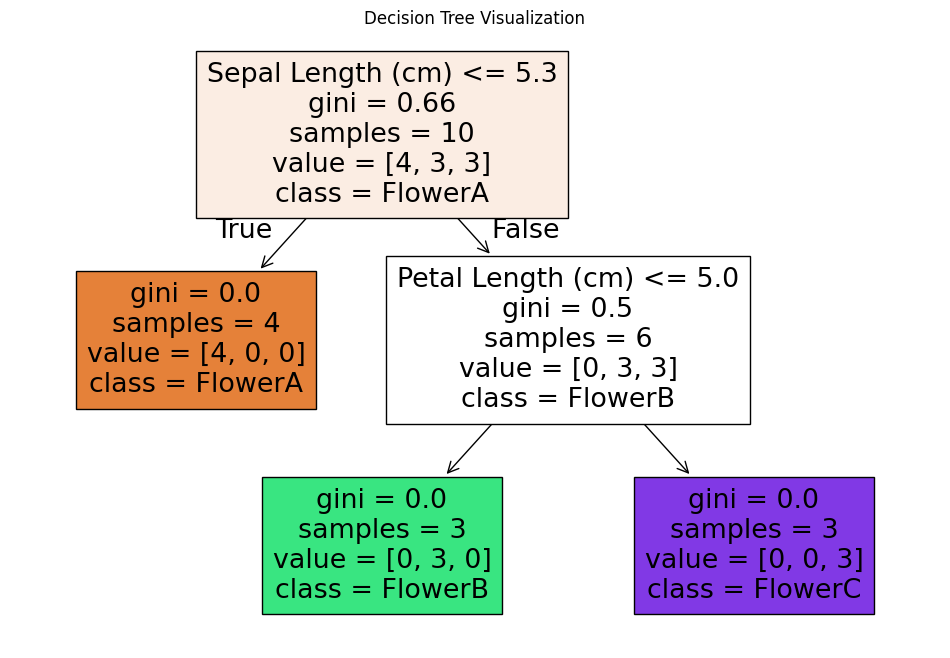

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming 'model' is already trained
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=df['Species'].unique())
plt.title("Decision Tree Visualization")
plt.show()

In [29]:
from sklearn.metrics import accuracy_score

# Assuming 'model' is already trained and 'X_test', 'y_test' are defined
# Predict species labels for the testing data
y_pred = model.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'model' is already trained and 'X_test', 'y_test' are defined
# Predict species labels for the testing data
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)


Classification Report:
               precision    recall  f1-score   support

     FlowerA       1.00      1.00      1.00         1
     FlowerB       1.00      1.00      1.00         2
     FlowerC       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion Matrix:
 [[1 0 0]
 [0 2 0]
 [0 0 2]]
